<hr/>

#Data Mining [EN.550.436]
**Tamás Budavári** - budavari@jhu.edu <br/>
**Class 5** - Sept 10, 2015

- Python and IPython examples
- Average, KDE and Dirac's $\delta$

<hr/>

<h1><font color="darkblue">Python by Examples</font></h1>

> tuple
list
function
class
for
map 
lambda
import

> numpy
matplotlib
scipy
sklearn
seaborn

In [1]:
# tuple
t = (1,2)
t = 100, 0.1
N, mu = t
print N

100


In [2]:
# list
l = [1,2,3,4,5]
print [l,l]

[[1, 2, 3, 4, 5], [1, 2, 3, 4, 5]]


In [3]:
# function
def f(x,k=2):
    return x**k

f(2,3)

8

In [4]:
import math
# class
class Robot:
    def __init__(self,x=0,y=0,angle=0):
        self.x, self.y, self.angle = x,y,angle
        self.path = [(x,y)]
    def move(self,l):
        self.x += l* math.cos(self.angle)
        self.y += l* math.sin(self.angle)
        self.path.append( (self.x, self.y) )
    def left(self,a):
        self.angle += a
    def right(self,a):
        self.left(-a)
        
r = Robot()
r.move(10)
r.left(math.pi/4)
r.move(5)
print r.path

[(0, 0), (10.0, 0.0), (13.535533905932738, 3.5355339059327373)]


In [5]:
# loops
for i in range(10):
    print i*i,

0 1 4 9 16 25 36 49 64 81


In [6]:
# map
map(f, range(10))

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [7]:
# lambda
g = lambda x: x*x
print g(2)

map(lambda x: x**3, range(10))

4


[0, 1, 8, 27, 64, 125, 216, 343, 512, 729]

In [8]:
[ i*i for i in range(10) ]

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [9]:
x = [1,2,3,4,5]
y = map(f,x)
print x
print y

print zip(x,y)

map(lambda t: t[0]+t[1], zip(x,y))

[1, 2, 3, 4, 5]
[1, 4, 9, 16, 25]
[(1, 1), (2, 4), (3, 9), (4, 16), (5, 25)]


[2, 6, 12, 20, 30]

In [10]:
# using math functions and routines
import math

print math.pi, math.sin(1.57)

3.14159265359 0.999999682932


In [11]:
# arrays: vectors and matrices
import numpy as np
a = np.array([l,l], dtype=np.int32)
print a.shape
print a.T

b = np.dot(a.T,a)
b

(2L, 5L)
[[1 1]
 [2 2]
 [3 3]
 [4 4]
 [5 5]]


array([[ 2,  4,  6,  8, 10],
       [ 4,  8, 12, 16, 20],
       [ 6, 12, 18, 24, 30],
       [ 8, 16, 24, 32, 40],
       [10, 20, 30, 40, 50]])

In [12]:
# slicing arrays
b[0:2,:3]

array([[ 2,  4,  6],
       [ 4,  8, 12]])

In [13]:
# componentwise operations
print np.sin(l)

map(math.sin, l)

[ 0.84147098  0.90929743  0.14112001 -0.7568025  -0.95892427]


[0.8414709848078965,
 0.9092974268256817,
 0.1411200080598672,
 -0.7568024953079282,
 -0.9589242746631385]

In [14]:
# matrix multiplication
np.dot(a, a.T)

array([[55, 55],
       [55, 55]])

In [15]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4,5],[5,4,3,2,1], '.r');
plt.savefig('test.png', dpi=120)

In [16]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


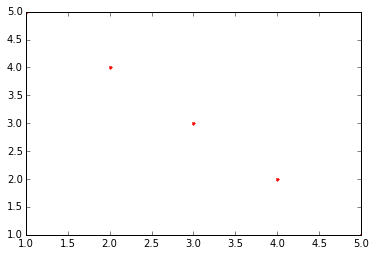

In [17]:
plt.plot([1,2,3,4,5],[5,4,3,2,1], '.r');

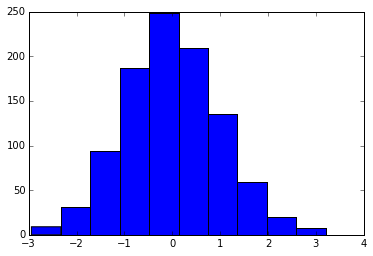

In [18]:
plt.hist(np.random.randn(1000));

In [19]:
import pandas as pd
dates = pd.date_range('2013-01-01', periods=6);
df = pd.DataFrame(np.random.randn(dates.size,4), index=dates, columns=list('ABCD'))

a = np.array(df['B'])
print a
df

[ 0.20034925  0.51746534 -0.20651926 -1.40174533  1.68461001  2.25084343]


,A,B,C,D
2013-01-01,0.466966,0.200349,-1.212433,2.722977
2013-01-02,0.374871,0.517465,0.064590,-0.675072
2013-01-03,0.975138,-0.206519,0.092777,-1.101373
2013-01-04,-0.129623,-1.401745,-0.585021,-1.001936
2013-01-05,-1.348452,1.684610,0.305736,-0.213118
2013-01-06,-0.232381,2.250843,0.703302,-1.137505


,X,Y
0,0,0.000000
1,1,0.309017


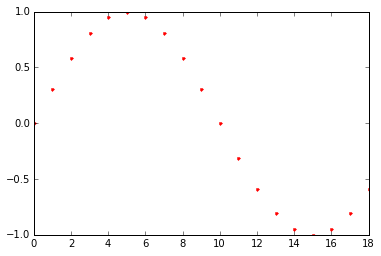

In [20]:
df = pd.read_csv('files/test.csv')
plt.plot(df['X'], df['Y'], '.r');
df[:2]

In [21]:
import pandas.io.data as web
import datetime as dt

df = web.DataReader('AAPL', 'yahoo', dt.datetime(2015,8,27), dt.datetime.now())
print np.array(df.Open)
df

[ 112.230003  112.169998  112.029999  110.150002  110.230003  112.489998
  108.970001  111.75      113.760002]


,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-08-27,112.230003,113.239998,110.019997,112.919998,84616100,112.919998
2015-08-28,112.169998,113.309998,111.540001,113.290001,53164400,113.290001
2015-08-31,112.029999,114.529999,112.000000,112.760002,56229300,112.760002
2015-09-01,110.150002,111.879997,107.360001,107.720001,76845900,107.720001
2015-09-02,110.230003,112.339996,109.129997,112.339996,61888800,112.339996
2015-09-03,112.489998,112.779999,110.040001,110.370003,52906400,110.370003
2015-09-04,108.970001,110.449997,108.510002,109.269997,49963900,109.269997
2015-09-08,111.750000,112.559998,110.320000,112.309998,54114200,112.309998
2015-09-09,113.760002,114.019997,109.769997,110.150002,84344400,110.150002


### Modules

- Computation

> [numpy](http://www.numpy.org/): arrays, vectorized functions, ...

> [scipy](http://www.scipy.org/): stats, solvers, ...

> [sklearn](http://scikit-learn.org/stable/index.html): machine learning, ...

- Data 

> [pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html): data structures, time series, ...

- Plotting

> [matplotlib](http://matplotlib.org/index.html): publication quality figures, animations, ...

> [seaborn](http://stanford.edu/~mwaskom/software/seaborn/#): statistical data visualization



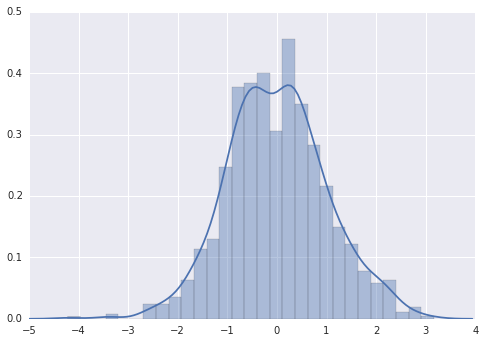

In [22]:
import seaborn as sns
sns.distplot(np.random.randn(1000));

In [23]:
from sklearn import linear_model
clf = linear_model.LinearRegression()
clf.fit ( [[0],[1],[2]], [10, 11, 12]);
print clf.predict([1.5])

11.5


<h1><font color="darkblue"> Anscombe's Quartet</font></h1>

### A Cautionary Tale

- Four different datasets $\big\{(x_i,y_i)\big\}$ with the 

> Same number of points

> Same mean

> Same variance

> Same correlations

> Same linear fits

- They must be the same, right?

,dataset,x,y
0,I,10,8.04
1,I,8,6.95
2,I,13,7.58


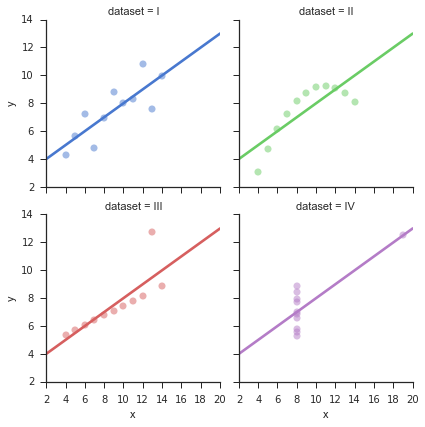

In [24]:
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Plot all 4
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", 
           data=df, col_wrap=2, ci=None, palette="muted", 
           size=3, scatter_kws={"s": 50, "alpha": 0.5});

df[:3]

<h1><font color="darkblue">Average and KDE</font></h1>

### The connection

- The expectation value is

> $\displaystyle \mathbb{E}[X] = \int x\,p(x)\,dx$

- Given a data set $\{x_i\}$ we could estimate

> $\displaystyle p(x) \approx \frac{1}{N} \sum_{i=1}^N K_h(x\!-\!x_i)$



### Detour: Dirac delta

- In the limit of $h\rightarrow{}0$, the kernel will become strange:

<img src="files/488px-Dirac_distribution_PDF.svg.png" align=right width=250>

> **Dirac's $\delta$** "function" is 0 everywhere except at 0 such that

> $\displaystyle \int \delta(x)\,dx = 1$

- Interesting properties, e.g., 

> $\displaystyle \int f(x)\,\delta(x\!-\!a)\,dx = f(a)$

-  See **distribution theory** and **functionals** for more background

### Result 

- Bad density estimation but if...

> $\displaystyle p(x) = \frac{1}{N} \sum_{i=1}^N \delta(x\!-\!x_i)$

- The expectation value

> $\displaystyle \mathbb{E}[X] =  \int x\, \frac{1}{N} \sum_{i=1}^N  \delta(x\!-\!x_i) \,dx$

> $\displaystyle \mathbb{E}[X] = \frac{1}{N} \sum_{i=1}^N \int x\, \delta(x\!-\!x_i) \,dx$

> $\displaystyle \mathbb{E}[X] = \frac{1}{N} \sum_{i=1}^N x_i$

